In [46]:
import numpy as np
from numpy import random

import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
height = np.random.randint(150,190,size = 20)
weight = np.random.randint(50,90,size = 20)
y = np.random.randint(-1,2,size = 20)

In [59]:
d = {'height':height,'weight':weight,'scaller':y}
dframe = DataFrame(d)
dframe['scaller'].loc[(dframe['scaller'] == 0)] = 1
dframe

,height,weight,scaller
0,165,69,1
1,178,74,1
2,166,61,1
3,186,57,-1
4,182,53,-1
5,156,62,-1
6,162,60,1
7,150,68,1
8,160,85,1
9,170,68,1


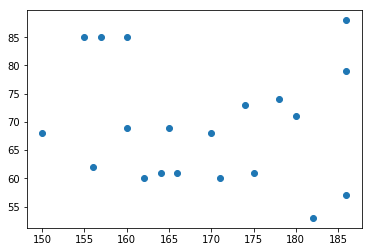

In [60]:
plt.scatter(height,weight,marker = 'o')

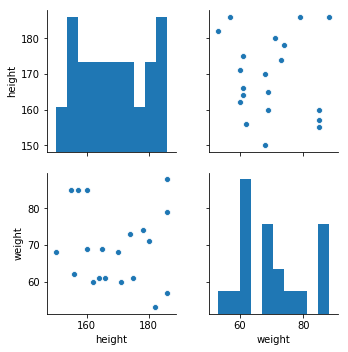

In [61]:
sns.pairplot(dframe,
        x_vars=["height", "weight"],
        y_vars=["height", "weight"])

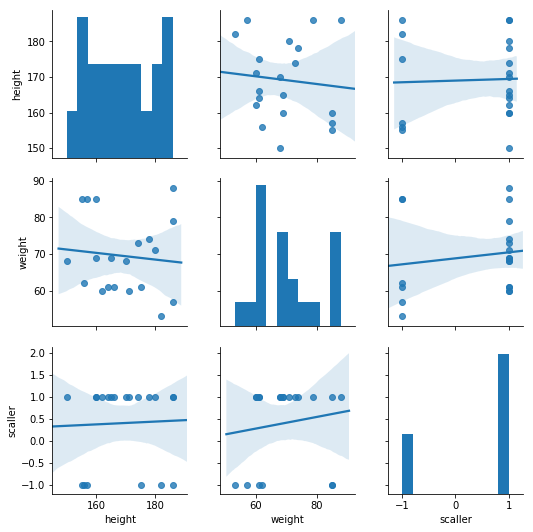

In [62]:
sns.pairplot(dframe, kind="reg")

In [63]:
w1, w2 ,w0 = 2, 5, 13
w = np.array([w1,w2,w0])

In [64]:
#シンプルな計算モデル

def forword(w1,x1,w2,x2,w0):
    out = w1 * x1 + w2 * x2 + w0
    return out
    
def step(a):
    if a > 0:
        return 1
    else:
        return -1

In [65]:
#np.linalg.norm()　→ベクターの長さ
np.cos(np.linalg.norm(np.dot(height[0],weight[0]))) * np.linalg.norm(w) 

13.949249843392666

1 1 1 -1 1 -1 1 1 -1 1 -1 1 -1 1 1 1 -1 -1 -1 -1 
1 -1 1 -1 -1 -1 -1 1 1 1 1 1 -1 1 1 1 -1 1 -1 1 


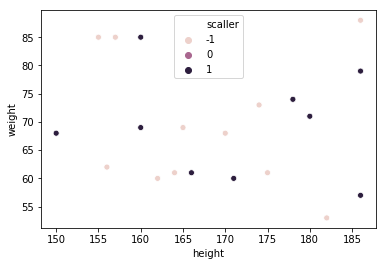

In [66]:
def forword(x1,x2,w):
    out = np.cos(np.linalg.norm(np.dot(x1,x2)) * np.linalg.norm(w))
    return out

def step(a):
    if a > 0:
        return 1
    else:
        return -1
    
def updateWeight(w, yi, x1, x2):
    w = np.linalg.norm(w) + yi * np.linalg.norm(np.dot(x1,x2))
    return w

def plotScatter(dframeT):
    sns.scatterplot(x='height',y='weight',hue='scaller',data = dframeT)



for loop in range(1000):
    oList = []
    for i in range(np.size(height)):
        o = step(forword(height[i],weight[i],w))

        if o != y[i]:
            w = updateWeight(w,y[i],height[i],weight[i])
            o = step(forword(height[i],weight[i],w))
        
        oList.append(o)
        
        if loop % 500 == 0:
            #print(np.array(oList))
            print(o,end=' ')
    if loop % 500 == 0:
        print()
        
dT = {'height':height,'weight':weight,'scaller':np.array(oList)}
dframeT = DataFrame(dT)
plotScatter(dframeT)

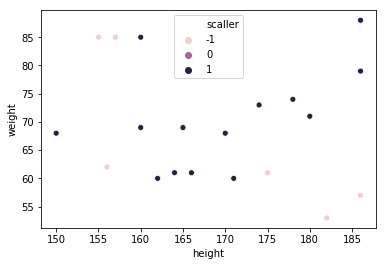

In [67]:
#元のデータ
sns.scatterplot(x='height',y='weight',hue='scaller',data = dframe)

In [14]:
step(np.cos(np.linalg.norm(np.dot(180,70)) * np.linalg.norm(w)))

-1